<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Задания" data-toc-modified-id="Задания-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Задания</a></span><ul class="toc-item"><li><span><a href="#Обучить-полносвязную-модель-на-MNIST" data-toc-modified-id="Обучить-полносвязную-модель-на-MNIST-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Обучить полносвязную модель на MNIST</a></span></li><li><span><a href="#Обучить-глубокую-сверточную-сеть-на-MNIST" data-toc-modified-id="Обучить-глубокую-сверточную-сеть-на-MNIST-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Обучить глубокую сверточную сеть на MNIST</a></span></li></ul></li></ul></div>

# Задания

## Обучить полносвязную модель на MNIST

In [1]:
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import datasets
from torch.utils.data import DataLoader
import numpy
import matplotlib.pyplot as plt

In [2]:
#hyper params
num_epoch = 10
cuda_device = -1
batch_size = 140
device = f'cuda:{cuda_device}' if cuda_device != -1 else 'cpu'
input_d = 28*28
hidden_d = 512
out_d = 10

In [3]:
#model
class MyModel(nn.Module):
    def __init__(self,
                 input_dim: int,
                 hidden_dim: int,
                 out_dim: int,
                 ):
        super().__init__()
        self.linear1 = nn.Linear(input_dim, hidden_dim, bias=True)
        self.linear2 = nn.Linear(hidden_dim, hidden_dim, bias=True)
        self.linear3 = nn.Linear(hidden_dim, out_dim)

        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.activation(self.linear1(x))
        x = self.activation(self.linear2(x))
        x = self.activation(self.linear3(x))

        return x
    
    
def collate_fn(data):
    pics = []
    targets = []
    # data = [(pic, target), ....]
    for item in data:
        pics.append(numpy.array(item[0]))
        targets.append(item[1])

    return {
        'data': torch.from_numpy(numpy.array(pics)) / 255,
        'target': torch.from_numpy(numpy.array(targets))
    }


# init model
model = MyModel(input_d, hidden_d, out_d)
model = model.to(device)

#optimizer
optim = torch.optim.Adam(model.parameters(), lr=0.001)

#lr scheduler

#dataset
dataset = datasets.MNIST('.', download=False)


# plt.imshow(dataset.data[300].detach().numpy())
# plt.show()

#loss
criterion = nn.CrossEntropyLoss()

# train loop
for epoch in range(num_epoch):
    #dataloder
    data_loader = DataLoader(dataset=dataset,
                             batch_size=batch_size,
                             shuffle=True,
                             collate_fn=collate_fn,
                             drop_last=True,
                             )
    
    for i, batch in enumerate(data_loader):
        optim.zero_grad()
        data = batch['data'].to(device).float()
        predict = model(data.view(data.size(0), -1))
        loss = criterion(predict, batch['target'].to(device).long())
        loss.backward()
        optim.step()
            
        if i % 200 == 199:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, loss))
print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, loss))
            
print('Обучение закончено')

C:\Users\DNS\anaconda3\lib\site-packages\torch\autograd\__init__.py:154: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:112.)
  Variable._execution_engine.run_backward(


[1,   200] loss: 0.696
[1,   400] loss: 0.530
[2,   200] loss: 0.515
[2,   400] loss: 0.628
[3,   200] loss: 0.583
[3,   400] loss: 0.522
[4,   200] loss: 0.583
[4,   400] loss: 0.493
[5,   200] loss: 0.473
[5,   400] loss: 0.486
[6,   200] loss: 0.508
[6,   400] loss: 0.331
[7,   200] loss: 0.306
[7,   400] loss: 0.302
[8,   200] loss: 0.298
[8,   400] loss: 0.215
[9,   200] loss: 0.265
[9,   400] loss: 0.218
[10,   200] loss: 0.203
[10,   400] loss: 0.369
[10,   428] loss: 0.288
Обучение закончено


## Обучить глубокую сверточную сеть на MNIST

In [2]:
#hyper params
num_epoch = 5
cuda_device = -1
batch_size = 140
device = f'cuda:{cuda_device}' if cuda_device != -1 else 'cpu'
input_ch = 1
hidden_ch = 128
out_d = 10

In [3]:
#model
class MyModelCNN(nn.Module):
    def __init__(self,
                 in_channels: int,
                 hidden_channels: int,
                 n_classes: int,
                 ):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, hidden_channels, kernel_size=5, padding=2, stride=2) # 14 * 14
        self.bn1 = nn.BatchNorm2d(hidden_channels)
        self.pool = nn.MaxPool2d(2, 2) # 7 * 7
        self.conv2 = nn.Conv2d(hidden_channels, hidden_channels, kernel_size=3, padding=1, stride=1) # 7 * 7
        self.bn2 = nn.BatchNorm2d(hidden_channels)
        self.conv3 = nn.Conv2d(hidden_channels, 1, kernel_size=1, padding=0, stride=1) # 7 * 7
        self.linear1 = nn.Linear(7*7, n_classes, bias=True)

        self.activation = nn.ReLU()

    def forward(self, x):# 14 * 14
        x = self.activation(self.conv1(x))
        x = self.activation(self.bn1(x))
        x = self.activation(self.pool(x))
        x = self.activation(self.conv2(x))
        # print(x.shape)
        x = self.activation(self.bn2(x))
        x = self.activation(self.conv3(x))
        x = self.activation(self.linear1(x.view(x.size(0), -1)))

        return x


def collate_fn(data):
    pics = []
    targets = []
    # data = [(pic, target), ....]
    for item in data:
        pics.append(numpy.array(item[0]))
        targets.append(item[1])

    return {
        'data': torch.from_numpy(numpy.array(pics)) / 255,
        'target': torch.from_numpy(numpy.array(targets))
    }


# init model
model = MyModelCNN(input_ch, hidden_ch, out_d)
model = model.to(device)
model.train()
#optimizer
optim = torch.optim.Adam(model.parameters(), lr=0.001)

#lr scheduler

#dataset
dataset = datasets.MNIST('.', download=False)

#
# import matplotlib.pyplot as plt
# plt.imshow(dataset.data[0].detach().numpy())
# plt.show()
#loss
criterion = nn.CrossEntropyLoss()

# train loop
for epoch in range(num_epoch):
    #dataloder
    data_loader = DataLoader(dataset=dataset,
                             batch_size=batch_size,
                             shuffle=True,
                             collate_fn=collate_fn,
                             drop_last=True,
                             )
    for i, batch in enumerate(data_loader):
        optim.zero_grad()
        data = batch['data'].to(device).float()
        predict = model(data.unsqueeze(1))
        loss = criterion(predict, batch['target'].to(device).long())
        loss.backward()
        optim.step()
        
        if i % 200 == 199:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, loss))
print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, loss))
            
print('Обучение закончено')

C:\Users\DNS\anaconda3\lib\site-packages\torch\autograd\__init__.py:154: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:112.)
  Variable._execution_engine.run_backward(


[1,   200] loss: 0.105
[1,   400] loss: 0.172
[2,   200] loss: 0.032
[2,   400] loss: 0.018
[3,   200] loss: 0.068
[3,   400] loss: 0.036
[4,   200] loss: 0.015
[4,   400] loss: 0.091
[5,   200] loss: 0.012
[5,   400] loss: 0.011
[5,   428] loss: 0.007
Обучение закончено


Последний loss = 0.288 полносвязной модели. Последний loss = 0.007 глубокой сверточной сети при том, что в посленей num_epoch = 5 (полносвязная num_epoch = 10) и hidden_ch = 128 не увеличивал до 256.

In [5]:
import numpy as np

In [7]:
testloader = torch.utils.data.DataLoader(dataset)

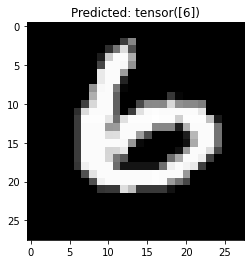

In [12]:
i = np.random.randint(low=0, high=10000)

def visualize_result(index):
    image = testloader.dataset.test_data[index].numpy()
    plt.imshow(image, cmap='gray')
    
    y_pred = model(torch.Tensor(image).view(1, 1, 28, 28))
    _, predicted = torch.max(y_pred, 1)
    
    plt.title(f'Predicted: {predicted}')

visualize_result(i)